<a href="https://colab.research.google.com/github/rational-ghost/notes/blob/main/Supervised%20Learning%20with%20scikit-learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets

In [67]:
import numpy as np
import pandas as pd

In [134]:
sales_df = pd.read_csv('https://assets.datacamp.com/production/repositories/5981/datasets/0013cbcdf127f3b44e855eb1df754b9dc3526d02/advertising_and_sales_clean.csv')
diabetes_df = pd.read_csv('https://assets.datacamp.com/production/repositories/5981/datasets/3d7b5bbdc7e91636cb1f9b62d9ca2a3959ce8aab/diabetes_clean.csv')
churn_df = pd.read_csv('https://assets.datacamp.com/production/repositories/5981/datasets/8582db71ec282f17c504c8eb794d54758fd8d5d8/telecom_churn_clean.csv')
music_df = pd.read_csv('https://assets.datacamp.com/production/repositories/5981/datasets/57b6060817a160b8d971c698766e485f2c6a4455/music_clean.csv')

# Classification

## Machine learning with scikit-learn

In [9]:
# !pip uninstall scikit-learn -y

# !pip install -U scikit-learn

In [10]:
import sklearn
sklearn.__version__

'1.2.2'

scikit-learn syntax
```
from sklearn.module import Model
model = Model()
model.fit(X, y)
predictions = model.predict(X_new)
print(predictions)
```

### Binary classification

In the video, you saw that there are two types of supervised learning — classification and regression. Recall that binary classification is used to predict a target variable that has only two labels, typically represented numerically with a zero or a one.

Your task is to examine the data and choose which column could be the target variable for binary classification.

In [8]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3333 non-null   int64  
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [11]:
churn_df['churn'].sample(n=5)

90      0
2553    0
472     0
2121    0
397     1
Name: churn, dtype: int64

## The classification challenge

Classifying labels of unseen data

1. Build a model
2. Model learns from the labeled data we pass to it
3. Pass unlabeled data to the model as input
4. Model predicts the labeles of unseen data

labeled data = training data

In [76]:
from sklearn.neighbors import KNeighborsClassifier

We split our data into X, a 2D array of our features, and y, a 1D array of the target values - in this case, churn status. scikit-learn requires that the features are in an array where each column is a feature and each row a different observation. Similarly, the target needs to be a single column with the same number of observations as the feature data. We use the dot-values attribute to convert X and y to NumPy arrays. 

In [62]:
X = churn_df[['total_day_charge', 'total_eve_charge']].values
X

array([[45.07, 16.78],
       [27.47, 16.62],
       [41.38, 10.3 ],
       ...,
       [30.74, 24.55],
       [36.35, 13.57],
       [39.85, 22.6 ]])

In [70]:
y = churn_df['churn'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
X.shape, y.shape

((3333, 2), (3333, 1))

In [71]:
# Instantiate our KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)

# Fit this classifier to our labeled data
knn.fit(X, y)

# Predicting on unlabeled data
X_new = np.array(
    [[65.8, 17.5],
     [24.4, 24.1],
     [50.1, 10.9]]
     )

X_new.shape

(3, 2)

In [72]:
predictions = knn.predict(X_new)
predictions

array([1, 0, 0])

### k-Nearest Neighbors: Fit

The features to use will be "account_length" and "customer_service_calls". The target, "churn", needs to be a single column with the same number of observations as the feature data.

You will convert the features and the target variable into NumPy arrays, create an instance of a KNN classifier, and then fit it to the data.

In [50]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [51]:
# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

In [52]:
# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [53]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### k-Nearest Neighbors: Predict

Now you have fit a KNN classifier, you can use it to predict the label of new data points. All available data was used for training, however, fortunately, there are new observations available. These have been preloaded for you as X_new.

The model knn, which you created and fit the data in the last exercise, has been preloaded for you. You will use your classifier to predict the labels of a set of new data points:

In [54]:
X_new = np.array(
    [[30.0, 17.5],
     [107.0, 24.1],
     [213.0, 10.9]]
     )

In [55]:
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


## Measuring model performance

Accuracy = correct predictions / total observations

We could compute accuracy on the data used to fit the classifier. However, as this data was used to train the model, performance will not be indicative of how well it can generalize to unseen data. 

It is common to split data into a training set and a test set.

In [43]:
from sklearn.model_selection import train_test_split

We commonly use 20-30% of our data as the test set. By setting the `test_size` argument to `0.3` we use 30% here.

The `random_state` argument sets a seed for a random number generator that splits the data. Using the same number when repeating this step allows us to reproduce the exact split and our downstream results. 

It is best practice to ensure our split reflects the proportion of labels in our data. So if churn occurs in 10% of observations, we want 10% of labels in our training and test sets to represent churn. We achieve this by setting `stratify` equal to `y`.

`train_test_split` returns four arrays: the training data, the test data, the training labels, and the test labels. We unpack these into `X_train`, `X_test`, `y_train`, and `y_test`. 

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size = 0.3,
    random_state = 21,
    stratify = y
  )

We then instantiate a KNN model and fit it to the training data using the `.fit()` method. To check the accuracy, we use the `.score()` method, passing `X_test` and `y_test`. 

In [74]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.872

The accuracy of our model is 88%, which is low given our labels have a 9 to 1 ratio.

In [69]:
churn_df['churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

Let's discuss how to interpret `k`. 

Simpler models are less able to detect relationships in the dataset, which is known as underfitting. In contrast, complex models can be sensitive to noise in the training data, rather than reflecting general trends. This is known as overfitting.

We can also interpret `k` using a model complexity curve. With a KNN model, we can calculate accuracy on the training and test sets using incremental k values, and plot the results.

We create empty dictionaries to store our train and test accuracies, and an array containing a range of k values.

In [78]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)

We use a for loop to repeat our previous workflow, building several models using a different number of neighbors. 

In [80]:
for i in neighbors: 
  # Instantiate a KNN model with n_neighbors = neighbor iterator.
  knn = KNeighborsClassifier(n_neighbors = i)

  # Fit the model to the training data
  knn.fit(X_train, y_train)

  # Calculate training and test set accuracy.
  # Store the results in respective dictionaries.
  train_accuracies[i] = knn.score(X_train, y_train)
  test_accuracies[i] = knn.score(X_test, y_test)

In [83]:
import matplotlib.pyplot as plt

In [90]:
train_accuracies.values()

dict_values([1.0, 0.9061294470638662, 0.9048435490784398, 0.8911273039005573, 0.8906986712387484, 0.8851264466352337, 0.8829832833261895, 0.8825546506643807, 0.8834119159879983, 0.8825546506643807, 0.8812687526789541, 0.8804114873553365, 0.8816973853407629, 0.8799828546935277, 0.8834119159879983, 0.8812687526789541, 0.8808401200171453, 0.8795542220317188, 0.8786969567081011, 0.8808401200171453, 0.8808401200171453, 0.8782683240462923, 0.8821260180025718, 0.8774110587226747, 0.8812687526789541])

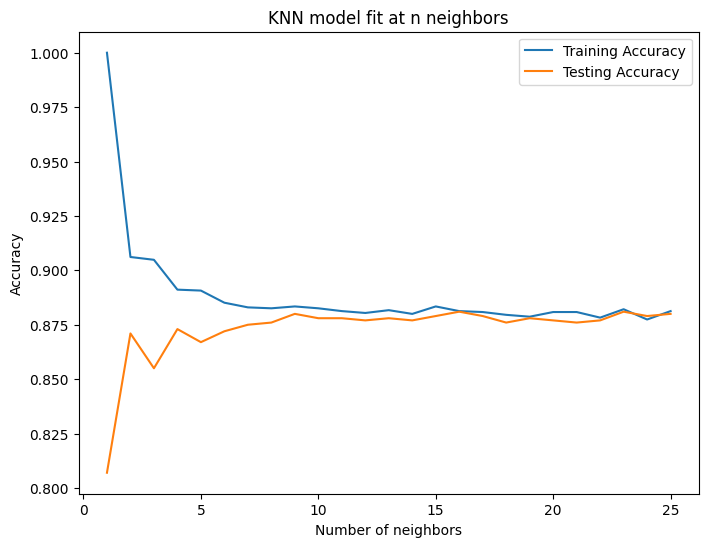

In [87]:
# Plot model complexity curve
plt.figure(figsize=(8, 6))
plt.title('KNN model fit at n neighbors')

# Plot traning set accuracy
plt.plot(
    neighbors, 
    train_accuracies.values(), 
    label = 'Training Accuracy')

# Plot test set accuracy
plt.plot(
    neighbors, 
    test_accuracies.values(), 
    label = 'Testing Accuracy')

# Add legend, labels, show plot
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### Train/test split + computing accuracy

Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the `churn_df` dataset!

In [91]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2, 
    random_state = 42, 
    stratify = y
    )
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


### Overfitting and underfitting

Interpreting model complexity is a great way to evaluate performance when utilizing supervised learning. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

You will generate accuracy scores for the training and test sets using a KNN classifier with different n_neighbor values, which you will plot in the next exercise.

The training and test sets have been created from the churn_df dataset and preloaded as `X_train`, `X_test`, `y_train`, and `y_test`. 

In [93]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors = neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


Notice how training accuracy decreases as the number of neighbors initially gets larger, and vice versa for the testing accuracy? These scores would be much easier to interpret in a line plot, so let's produce a model complexity curve of these results.

### Visualizing model complexity
Now you have calculated the accuracy of the KNN model on the training and test sets using various values of n_neighbors, you can create a model complexity curve to visualize how performance changes as the model becomes less complex!

The variables neighbors, train_accuracies, and test_accuracies, which you generated in the previous exercise, have all been preloaded for you. You will plot the results to aid in finding the optimal number of neighbors for your model.

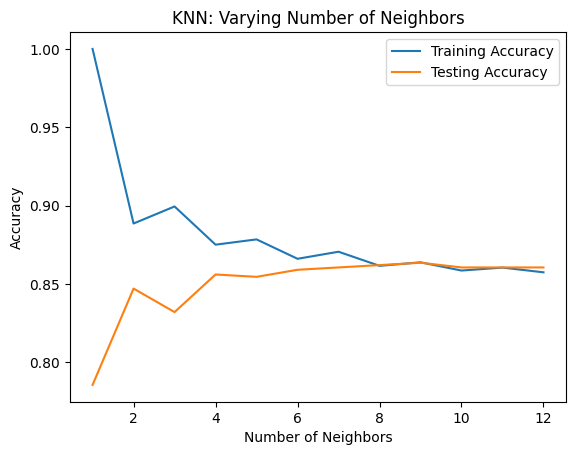

In [94]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

See how training accuracy decreases and test accuracy increases as the number of neighbors gets larger. For the test set, accuracy peaks with 7 neighbors, suggesting it is the optimal value for our model.

# Regression

In [109]:
print(diabetes_df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


In [110]:
X = diabetes_df.drop('glucose', axis=1).values
X

array([[ 6.   , 72.   , 35.   , ...,  0.627, 50.   ,  1.   ],
       [ 1.   , 66.   , 29.   , ...,  0.351, 31.   ,  0.   ],
       [ 8.   , 64.   ,  0.   , ...,  0.672, 32.   ,  1.   ],
       ...,
       [ 5.   , 72.   , 23.   , ...,  0.245, 30.   ,  0.   ],
       [ 1.   , 60.   ,  0.   , ...,  0.349, 47.   ,  1.   ],
       [ 1.   , 70.   , 31.   , ...,  0.315, 23.   ,  0.   ]])

In [111]:
y = diabetes_df['glucose'].values
y[0:5]

array([148,  85, 183,  89, 137])

Making predictions from a single feature

To start, let's try to predict blood glucose levels from a single feature: body mass index. To do this, we slice out the BMI column of X, which is the fourth column, storing as the variable X_bmi. 

Checking the shape of y and X_bmi, we see that they are both one-dimensional arrays

In [123]:
X_bmi = X[:, 4]
X_bmi = diabetes_df['bmi'].values # equivalent
# y.shape, X_bmi.shape
X_bmi[0:5]

array([33.6, 26.6, 23.3, 28.1, 43.1])

This is fine for y, but our features must be formatted as a two-dimensional array to be accepted by scikit-learn. To convert the shape of X_bmi we apply NumPy's dot-reshape method, passing minus one followed by one. Printing the shape again shows X_bmi is now the correct shape for our model.

In [124]:
X_bmi = X_bmi.reshape(-1, 1)
X_bmi.shape

(768, 1)

Now, let's plot blood glucose levels as a function of body mass index. 

In [116]:
import matplotlib.pyplot as plt

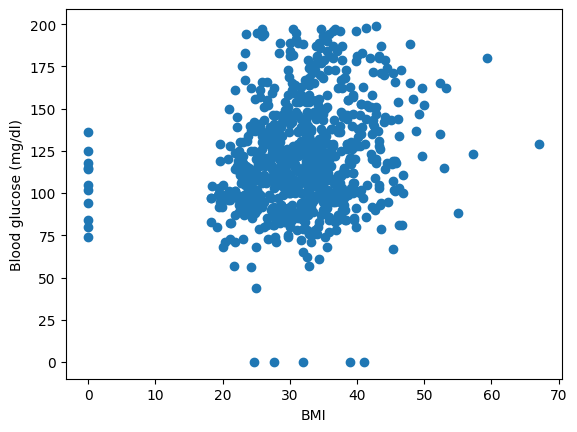

In [125]:
plt.scatter(X_bmi, y)
plt.ylabel('Blood glucose (mg/dl)')
plt.xlabel('BMI')
plt.show()

We can see that, generally, as body mass index increases, blood glucose levels also tend to increase.

It's time to fit a regression model to our data. We're going to use a model called linear regression, which fits a straight line to our data. We will explain the mechanics of linear regression in the next video, but first, let's see how to fit it and plot predictions.

In [126]:
# Import model
from sklearn.linear_model import LinearRegression

# Instantiate regression model
reg = LinearRegression()

As we are modeling the relationship between the feature, body mass index, and the target, blood glucose levels, rather than predicting target values for new observations, we fit the model to all of our feature observations. We do this by calling `reg.fit()` and passing in the feature data and the target variable, the same as we did for classification problems. 

In [127]:
reg.fit(X_bmi, y)

LinearRegression()

After this, we can create the predictions variable by calling reg-dot-predict and passing in our features. As we are predicting the target values of the features used to train the model, this gives us a line of best fit for our data.

In [128]:
predictions = reg.predict(X_bmi)

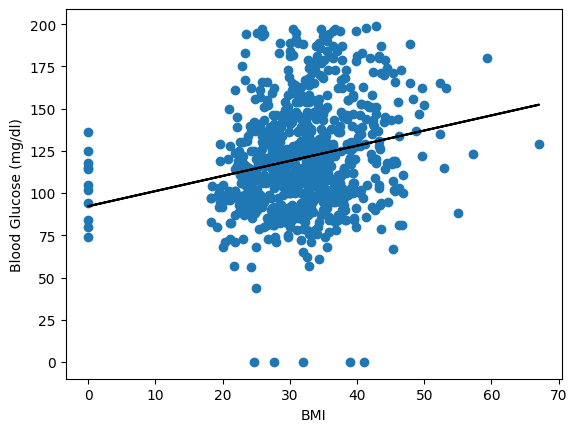

In [132]:
plt.scatter(X_bmi, y)

plt.plot(X_bmi, predictions, color='black')

plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('BMI')
plt.show()

### Creating features

In this chapter, you will work with a dataset called sales_df, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign.

In [137]:
sales_df = sales_df.drop('influencer', axis=1)

In [139]:
print(sales_df.head())

        tv     radio  social_media      sales
0  16000.0   6566.23       2907.98   54732.76
1  13000.0   9237.76       2409.57   46677.90
2  41000.0  15886.45       2913.41  150177.83
3  83000.0  30020.03       6922.30  298246.34
4  15000.0   8437.41       1406.00   56594.18


You will use the advertising expenditure as features to predict sales values, initially working with the "radio" column. 

However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.

In [143]:
# Create X from the radio column's values
X = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


### Building a linear regression model

Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

In [ ]:
y = sales_df["sales"].values
X = sales_df["radio"].values.reshape(-1, 1)

In [144]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


See how sales values for the first five predictions range from 95,000 to over 290,000. Let's visualize the model's fit.

### Visualizing a linear regression model

Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between `radio` advertising expenditure and `sales` values. 

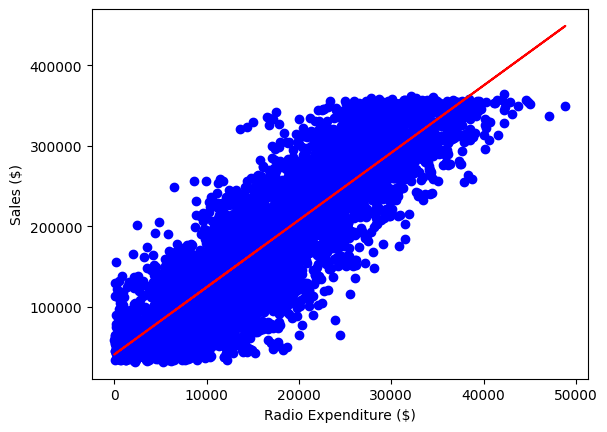

In [146]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

The model nicely captures a near-perfect linear correlation between radio advertising expenditure and sales! Now let's take a look at what is going on under the hood to calculate this relationship.

## The basics of linear regression